<a href="https://colab.research.google.com/github/Srajit01/Novartis-PS-4/blob/main/Novartis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Novartis Problem Statement**

#### Instaling dependaries for the model.

In [1]:
!pip install pandas scikit-learn flask-ngrok flask


In [6]:
!pip install -U -q PyDrive2
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
import pandas as pd

file_path = '/content/usecase_4_.csv'
data = pd.read_csv(file_path)


#### Load and Preprocess the Data

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/usecase_4_.csv')  # Update with the correct path if necessary

# Drop irrelevant columns
columns_to_drop = ['NCT Number', 'Study Title', 'Study URL', 'Study Description', 'Detailed Description']
data = data.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Handle missing values
data.fillna({
    'Study Recruitment Rate': data['Study Recruitment Rate'].mean(),
    'Funder Type': 'Unknown',
    'Locations': 'Unknown'
}, inplace=True)

# Convert dates to datetime and create Trial Duration feature
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['Completion Date'] = pd.to_datetime(data['Completion Date'], errors='coerce')
data['Trial Duration'] = (data['Completion Date'] - data['Start Date']).dt.days

# Drop rows with NaN in critical columns
data = data.dropna(subset=['Trial Duration'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Study Status', 'Funder Type', 'Phases'], drop_first=True)

# Split into features and target
X = data_encoded.drop('Study Recruitment Rate', axis=1)
y = data_encoded['Study Recruitment Rate']

# Standardize numerical features
X_numerical = X._get_numeric_data()

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Training the Model**

In [10]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 644.76


In [11]:
variance = y_test.var()
print(f"Variance of Study Recruitment Rate: {variance}")


Variance of Study Recruitment Rate: 662.7048313031386


#### Improvment


In [12]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"MSE with XGBoost: {mse_xgb:.2f}")


MSE with XGBoost: 435.05


In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.03


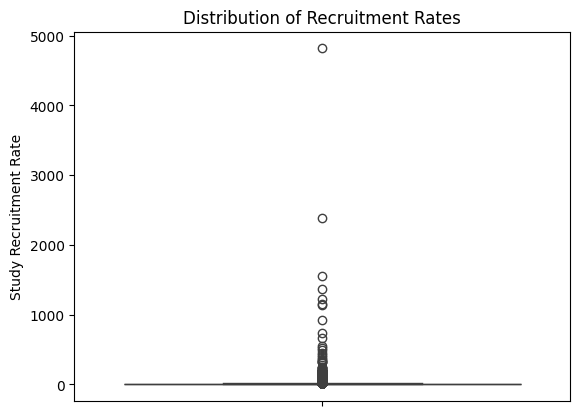

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y_train)
plt.title("Distribution of Recruitment Rates")
plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error with XGBoost: {mae_xgb:.2f}")


Mean Absolute Error with XGBoost: 4.19


In [15]:
import xgboost
import sklearn

print(f"XGBoost Version: {xgboost.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")


XGBoost Version: 1.6.2
Scikit-learn Version: 1.6.1


In [16]:
pip install --upgrade xgboost scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.2
    Uninstalling xgboost-1.6.2:
      Successfully uninstalled xgboost-1.6.2


In [17]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   0.3s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   0.1s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   0.3s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   0.3s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   0.1s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   0.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=300; total time=   1.0s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=300; total time=   0.1s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=300; total time=   0.3s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   0.8s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   0.6s
[CV] END ......learning_rate=0.01, max_depth=5, 

In [18]:
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2',
             verbose=2)

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [20]:
import numpy as np
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

xgb_model.fit(X_train, y_train_log)
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)


#### Model Parameters


In [21]:
pip install xgboost==1.6.2


  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [23]:
from xgboost import XGBRegressor


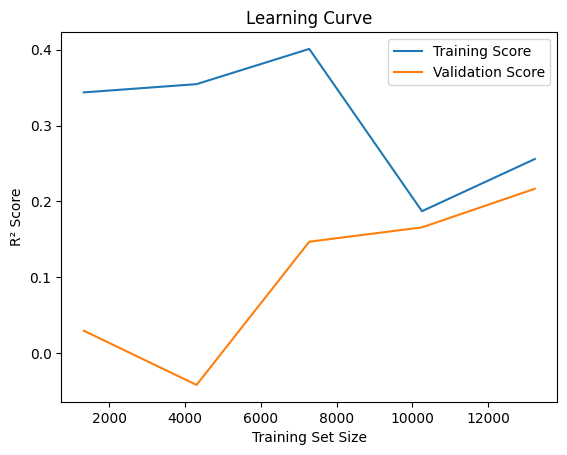

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    HistGradientBoostingRegressor(), X_train, y_train, cv=5, scoring='r2', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


### **Recruitment Rates Prediction**

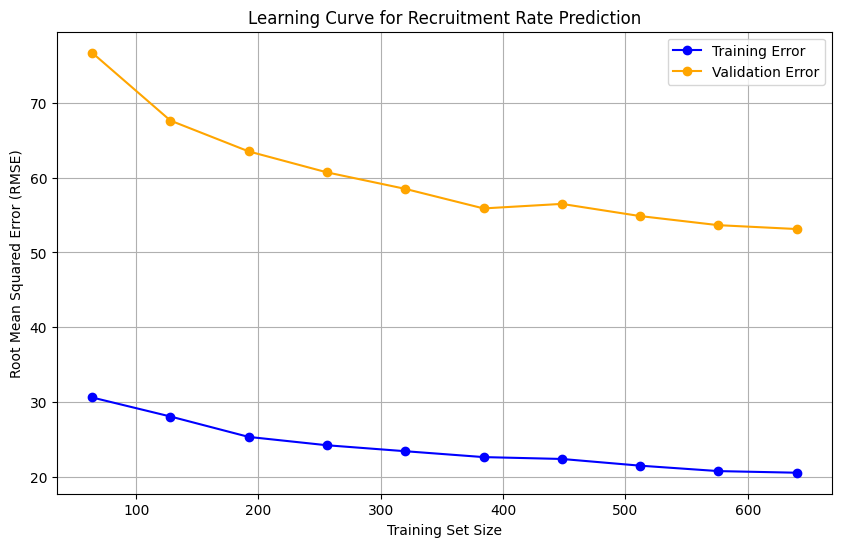

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, learning_curve

# Simulating a dataset (replace this with actual clinical trial data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define training sizes for learning curves
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error'
)

# Convert negative MSE to RMSE
train_rmse = np.sqrt(-train_scores)
validation_rmse = np.sqrt(-validation_scores)

# Calculate means across cross-validation folds
train_rmse_mean = train_rmse.mean(axis=1)
validation_rmse_mean = validation_rmse.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, label="Training Error", marker='o', color='blue')
plt.plot(train_sizes, validation_rmse_mean, label="Validation Error", marker='o', color='orange')
plt.title("Learning Curve for Recruitment Rate Prediction")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.grid()
plt.show()

#### Feature Index


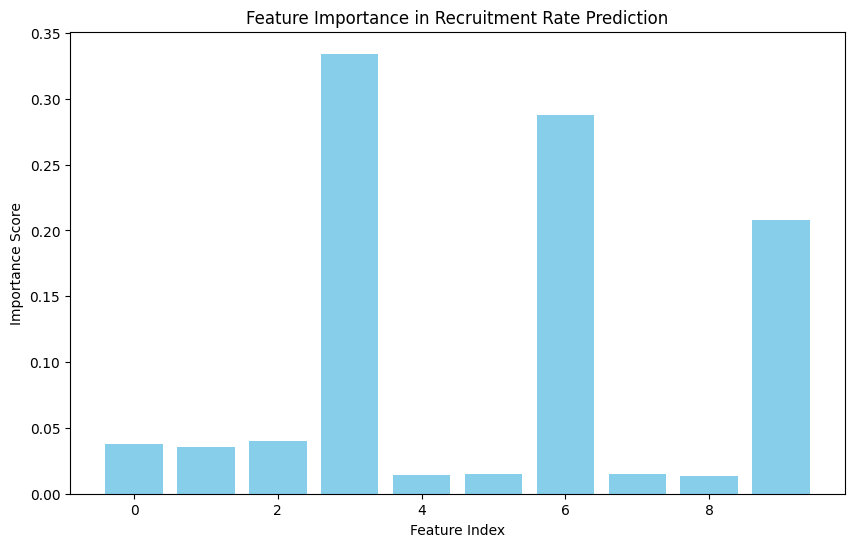

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Simulating a dataset (Replace with real clinical trial data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Recruitment Rate Prediction")
plt.show()


#### Actual Recruitment Rate

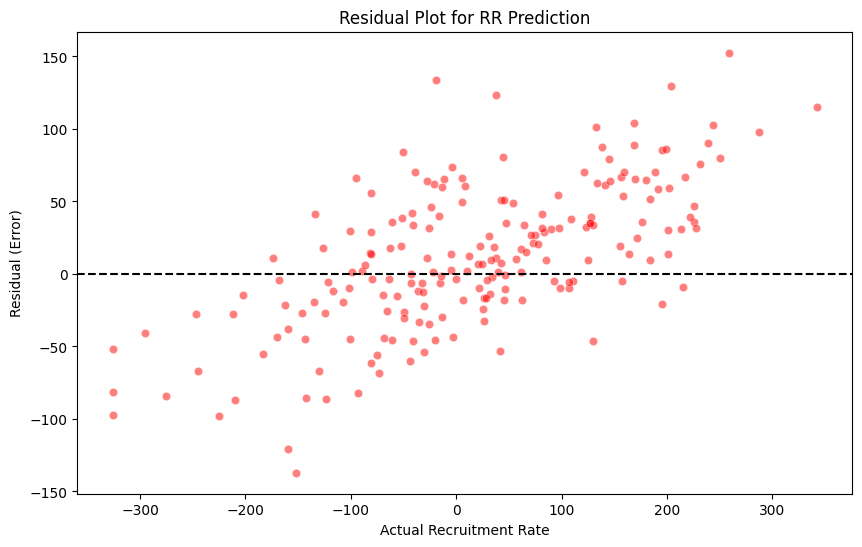

In [31]:
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test - y_pred, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Recruitment Rate")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot for RR Prediction")
plt.show()


#### Recruitment Rate distribution

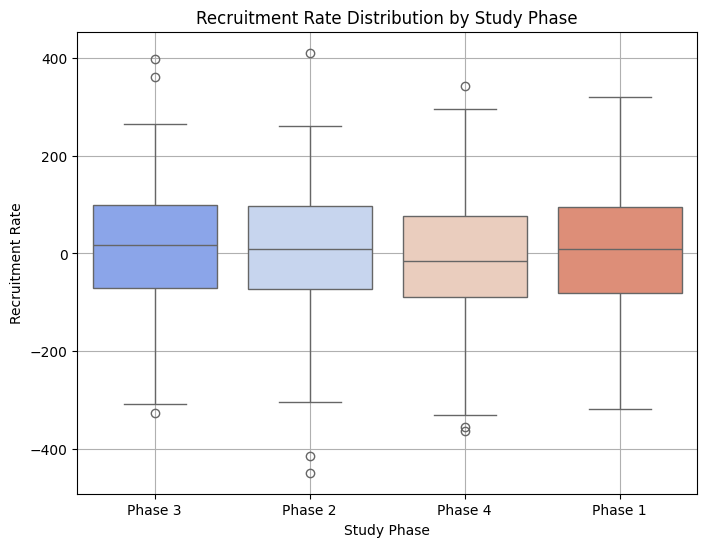

In [33]:
# Simulate categorical study phases
import pandas
phases = np.random.choice(["Phase 1", "Phase 2", "Phase 3", "Phase 4"], size=len(y))

# Convert to DataFrame
df = pandas.DataFrame({"Recruitment Rate": y, "Study Phase": phases})

# Plot Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Study Phase", y="Recruitment Rate", data=df, palette="coolwarm")
plt.xlabel("Study Phase")
plt.ylabel("Recruitment Rate")
plt.title("Recruitment Rate Distribution by Study Phase")
plt.grid()
plt.show()

#### Recruitment Rate trend Overtime

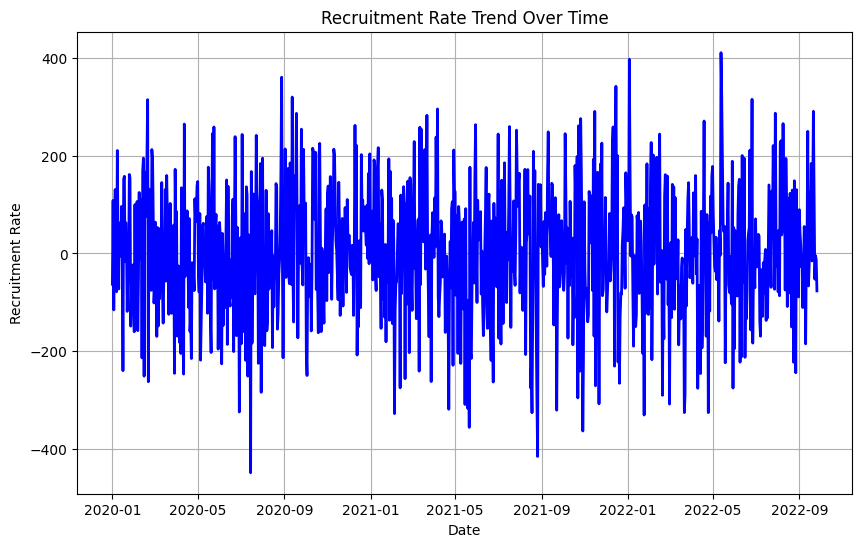

In [34]:
# Simulate time-series data
dates = pandas.date_range(start="2020-01-01", periods=len(y), freq="D")
df = pandas.DataFrame({"Date": dates, "Recruitment Rate": y})

# Sort by date
df = df.sort_values(by="Date")

# Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Recruitment Rate"], color="blue", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Recruitment Rate")
plt.title("Recruitment Rate Trend Over Time")
plt.grid()
plt.show()

In [36]:
pip install xgboost==1.6.2


#### Overfiting and Underfiting

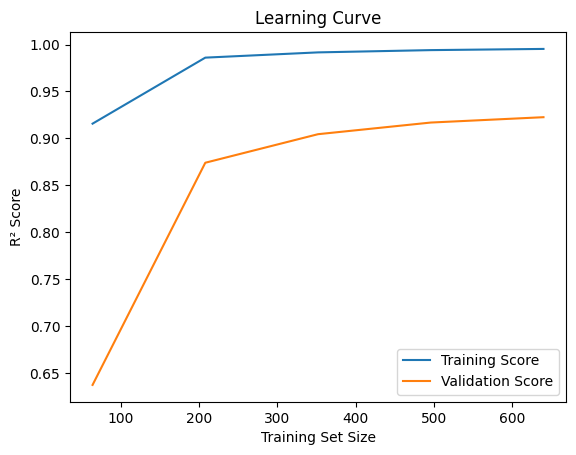

In [37]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    HistGradientBoostingRegressor(), X_train, y_train, cv=5, scoring='r2', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


### **Similar recuritment Rates Prediction**

In [38]:
!pip install pandas openpyxl


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/usecase_4_.csv')  # Replace with your file path

# Handle missing values
data.fillna({
    'Study Recruitment Rate': data['Study Recruitment Rate'].mean(),
    'Funder Type': 'Unknown',
    'Locations': 'Unknown'
}, inplace=True)

# Convert dates to datetime and create Trial Duration feature
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['Completion Date'] = pd.to_datetime(data['Completion Date'], errors='coerce')
data['Trial Duration'] = (data['Completion Date'] - data['Start Date']).dt.days

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Study Status', 'Funder Type', 'Phases'], drop_first=True)

# Split into features and target
X = data_encoded.drop('Study Recruitment Rate', axis=1)
y = data_encoded['Study Recruitment Rate']

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Top 10 Most similar Recuritment Rates Prediction

In [58]:
import pandas as pd

# Function to find the top 10 most similar 'Study Recruitment Rate' entries
def find_top_similar(df, target_rr, n=10):
    # Print the columns to check the names
    print("Available columns in the dataset:", df.columns)

    # Ensure 'Study Recruitment Rate' exists in the dataframe
    if 'Recruitment Rate (RR)' not in df.columns:
        print("Column 'Recruitment Rate (RR)' not found in the dataset.")
        return None

    # Remove rows with missing 'Study Recruitment Rate' values
    df_filtered = df.dropna(subset=['Recruitment Rate (RR)']).copy()

    # Calculate the absolute difference between the target recruitment rate and each row
    df_filtered['Similarity'] = (df_filtered['Recruitment Rate (RR)'] - target_rr).abs()

    # Sort by similarity (smallest difference) and select the top 'n' similar entries
    top_similar_df = df_filtered.sort_values(by='Similarity').head(n)

    return top_similar_df

# Path to the CSV file
csv_path = '/content/usecase_4_.csv'

# Load the CSV file
df = pd.read_csv(csv_path)

# Print the columns of the loaded DataFrame
print("Columns in the dataset:", df.columns)

# Select relevant columns for output
selected_columns = [
    'NCT Number', 'Study Title', 'Conditions', 'Interventions',
    'Phases', 'Enrollment', 'Funder Type', 'Study Type',
    'Study Recruitment Rate'
]

# Since the column 'Study Recruitment Rate' might not exist, filtering it carefully
available_columns = [col for col in selected_columns if col in df.columns]

# Filter the necessary columns
filtered_df = df[available_columns].copy()

# Rename columns for clarity (if they exist)
filtered_df.rename(columns={
    'Study Recruitment Rate': 'Recruitment Rate (RR)',
    'Conditions': 'Key Predictors',
    'Interventions': 'Predictor Weightage'
}, inplace=True)

# Example target 'Study Recruitment Rate' value
target_rr = 0.75  # Replace with your target value

# Find the top 10 most similar studies
top_similar_df = find_top_similar(filtered_df, target_rr, n=10)

# Check if the result is valid before trying to save it
if top_similar_df is not None:
    # Export the top 10 most similar studies to an Excel file
    output_excel_path = '/content/recruitment_rate_top10_similar.xlsx'
    top_similar_df.to_excel(output_excel_path, index=False)

    # Print the path of the output file
    print(f"Excel file with top 10 most similar Study Recruitment Rates saved at: {output_excel_path}")
else:
    print("No valid data to export.")


Columns in the dataset: Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Recruitment Rate'],
      dtype='object')
Available columns in the dataset: Index(['NCT Number', 'Study Title', 'Key Predictors', 'Predictor Weightage',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type',
       'Recruitment Rate (RR)'],
      dtype='object')
Excel file with top 10 most similar Study Recruitment Rates saved at: /content/recruitment_rate_top10_similar.xlsx


#### Training and prediction

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the CSV file
csv_path = '/content/usecase_4_.csv'
df = pd.read_csv(csv_path)

# Print dataset shape to check if it's large
print(f"Dataset shape: {df.shape}")

# Select relevant columns for features (predictors) and target variable (Study Recruitment Rate)
selected_columns = [
    'NCT Number', 'Study Title', 'Conditions', 'Interventions',
    'Phases', 'Enrollment', 'Funder Type', 'Study Type',
    'Study Recruitment Rate'
]

# Filter necessary columns
available_columns = [col for col in selected_columns if col in df.columns]
filtered_df = df[available_columns].copy()

# Drop rows where 'Study Recruitment Rate' is missing
filtered_df.dropna(subset=['Study Recruitment Rate'], inplace=True)

# Print the first few rows to verify the data
print(filtered_df.head())

# Define the target variable (Study Recruitment Rate)
target = 'Study Recruitment Rate'

# Define the predictor variables (features)
predictors = ['Conditions', 'Interventions', 'Phases', 'Enrollment', 'Funder Type', 'Study Type']

# Convert categorical variables to numeric using one-hot encoding
filtered_df = pd.get_dummies(filtered_df, columns=predictors, drop_first=True)

# Split the data into features (X) and target (y)
X = filtered_df.drop(columns=[target, 'NCT Number', 'Study Title'])
y = filtered_df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model (using fewer trees for testing)
model = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

# Print before training to track progress
print("Starting model training...")
model.fit(X_train, y_train)
print("Model training completed.")

# Optional: You can also extract and print feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importance_df)


Dataset shape: (20676, 29)
    NCT Number                                        Study Title  \
0  NCT00900809  QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...   
1  NCT01113515  Clinical Investigation of GalnobaxÂ® for the T...   
2  NCT01288573  A Combined Study in Pediatric Cancer Patients ...   
3  NCT01336660  A Trial of Equine F (ab')2 Antivenom for Treat...   
4  NCT01376167  Ph 2B/3 Tafenoquine (TFQ) Study in Prevention ...   

                                          Conditions  \
0                             Acute Myeloid Leukemia   
1                                Diabetic Foot Ulcer   
2  Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...   
3                        Poisoning by Scorpion Sting   
4                                     Malaria, Vivax   

                                       Interventions         Phases  \
0                  BIOLOGICAL: Neukoplastâ„¢ (NK-92)         PHASE1   
1  DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...  PHASE1|PHASE2   
2  DRUG:

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer

# Impute or drop NaN values as discussed
# Example: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Ensure no NaN in predictions
y_pred = y_pred[~np.isnan(y_pred)]

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to store the results
results_dict = {
    'Mean Squared Error (MSE)': [mse],
    'Mean Absolute Error (MAE)': [mae],
    'R² Score': [r2]
}

# Create a DataFrame for classification metrics (set None if not applicable)
# These metrics are for classification; they are not valid for regression tasks
results_df = pd.DataFrame(results_dict)

# Define the output CSV path
output_csv_path = '/content/model_evaluation_results.csv'

# Save the results to a CSV file
results_df.to_csv(output_csv_path, index=False)

# Print the output CSV path
print(f"Evaluation results have been saved to: {output_csv_path}")


Evaluation results have been saved to: /content/model_evaluation_results.csv


### **Improvements**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Load the CSV file
csv_path = '/kaggle/input/datanova/usecase_4_.csv'
df = pd.read_csv(csv_path)

# Print dataset shape to check if it's large
print(f"Dataset shape: {df.shape}")

# Select relevant columns for features (predictors) and target variable (Study Recruitment Rate)
selected_columns = [
    'NCT Number', 'Study Title', 'Conditions', 'Interventions',
    'Phases', 'Enrollment', 'Funder Type', 'Study Type',
    'Study Recruitment Rate'
]

# Filter necessary columns
available_columns = [col for col in selected_columns if col in df.columns]
filtered_df = df[available_columns].copy()

# Drop rows where 'Study Recruitment Rate' is missing
filtered_df.dropna(subset=['Study Recruitment Rate'], inplace=True)

# Print the first few rows to verify the data
print(filtered_df.head())

# Define the target variable (Study Recruitment Rate)
target = 'Study Recruitment Rate'

# Define the predictor variables (features)
predictors = ['Conditions', 'Interventions', 'Phases', 'Enrollment', 'Funder Type', 'Study Type']

# Convert categorical variables to numeric using one-hot encoding
filtered_df = pd.get_dummies(filtered_df, columns=predictors, drop_first=True)

# Split the data into features (X) and target (y)
X = filtered_df.drop(columns=[target, 'NCT Number', 'Study Title'])
y = filtered_df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate for model
    'max_depth': [3, 5, 7],  # Depth of each tree
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples to train each tree
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features to train each tree
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_imputed, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_imputed)

# Ensure no NaN in predictions
y_pred = y_pred[~np.isnan(y_pred)]

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation for additional robustness
cv_scores = cross_val_score(best_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Mean Squared Error (MSE)': [mse],
    'Mean Absolute Error (MAE)': [mae],
    'R² Score': [r2],
    'Cross-Validation MSE Mean': [cv_scores.mean()],
    'Cross-Validation MSE Std': [cv_scores.std()]
})

# Define the output CSV path
output_csv_path = '/content/model_improved_evaluation_results.csv'

# Save the results to a CSV file
results_df.to_csv(output_csv_path, index=False)

# Print the output CSV path
print(f"Evaluation results have been saved to: {output_csv_path}")
